In [2]:
import os
os.chdir('/content/drive/MyDrive/Work/MultiModal-Movie-Genre-Classifier/')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.listdir()

['.gitignore',
 'notebooks',
 '.git',
 'data',
 'requirements.txt',
 'best_model.h5']

In [ ]:
import pandas as pd
df=pd.read_csv('./data/Combined.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,movie_id,description,genre,Image
0,tt1798632,A young girl tries to understand how she myste...,horror,[[[ 35 11 11]\n [ 35 11 11]\n [ 35 11 ...
1,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy,[[[ 75 105 97]\n [ 69 99 91]\n [ 60 89 ...
2,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance,[[[254 254 254]\n [254 254 254]\n [254 254 2...
3,tt7149730,A reformed hunter living in isolation on a wil...,action,[[[ 77 88 94]\n [ 74 85 91]\n [ 70 81 ...
4,tt3876910,A reformed sociopath journeys to a remote isla...,action,[[[244 228 195]\n [244 228 195]\n [244 228 1...


In [ ]:
import pandas as pd
df=pd.read_csv('./data/Description.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
len(df)

101598

<Axes: xlabel='genre'>

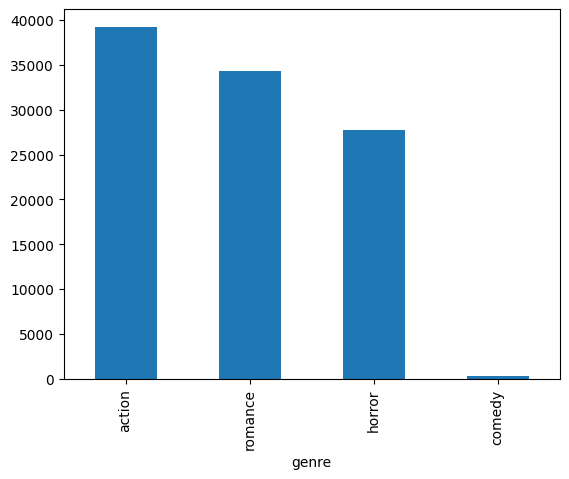

In [ ]:
df['genre'].value_counts().plot(kind='bar')

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter


# Instantiate the SentenceTransformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Generate contextual embeddings for movie descriptions
texts = df['description'].tolist()
embeddings = model.encode(texts)

# Get the labels (genres)
labels = df['genre'].values

# Print original distribution
print("Original class distribution:", Counter(labels))

# Use SMOTE to oversample the minority class (here, 'comedy')
# Use k_neighbors=3 due to very few samples for the comedy class
smote = SMOTE(sampling_strategy='minority', k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(embeddings, labels)

# Print new distribution after oversampling
print("Resampled class distribution:", Counter(y_resampled))

# X_resampled now contains the oversampled embeddings,
# and y_resampled contains the corresponding genre labels.
# These can be used to train your downstream classifier.


/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Work/MultiModal-Movie-Genre-Classifier/data/IMDB_four_genre_larger_plot_description.csv')
df.head()

,movie_id,description,genre
0,tt12783454,Elle Evans (Joey King) has finally completed h...,romance
1,tt1798632,A young girl tries to understand how she myste...,horror
2,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy
3,tt8522006,Abby Holland (Kristen Stewart) and Harper Cald...,romance
4,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance


In [14]:
Description=df['description']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Genre=LE.fit_transform(df['genre'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Description, Genre, test_size=0.2, random_state=42)


In [9]:
from sentence_transformers import SentenceTransformer

# Replace model name
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

# Encode with increased token window
X_train_vectors = model.encode(
    X_train.tolist(),
    convert_to_numpy=True,
    normalize_embeddings=True,
    truncate_dim=384
)

/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
X_test_vectors = model.encode(
    X_test.tolist(),
    convert_to_numpy=True,
    normalize_embeddings=True,
    truncate_dim=384
)

In [15]:
import joblib
joblib.dump(X_train_vectors, '/content/drive/MyDrive/Work/MultiModal-Movie-Genre-Classifier/data/X_train_vectors.pkl')
joblib.dump(X_test_vectors, '/content/drive/MyDrive/Work/MultiModal-Movie-Genre-Classifier/data/X_test_vectors.pkl')

['/content/drive/MyDrive/Work/MultiModal-Movie-Genre-Classifier/data/X_test_vectors.pkl']

In [4]:
import joblib
X_train_vectors=joblib.load('/content/drive/MyDrive/Work/MultiModal-Movie-Genre-Classifier/data/X_train_vectors.pkl')
X_test_vectors=joblib.load('/content/drive/MyDrive/Work/MultiModal-Movie-Genre-Classifier/data/X_test_vectors.pkl')

In [12]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize classifiers
classifiers_transformer = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42)
}
for name, clf in classifiers_transformer.items():
    print(f"\n{name} Evaluation:")

    # Train model
    clf.fit(X_train_vectors, y_train)

    # Predictions
    y_pred = clf.predict(X_test_vectors)

    # Calculate metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_vectors, y_train, cv=skf, scoring='accuracy')
    print(f"Cross-val Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


Logistic Regression Evaluation:
Accuracy: 0.7350
Precision: 0.7365
Recall: 0.7350
F1-Score: 0.7347
Cross-val Accuracy: 0.7438 (±0.0119)

Gaussian NB Evaluation:
Accuracy: 0.7300
Precision: 0.7274
Recall: 0.7300
F1-Score: 0.7283
Cross-val Accuracy: 0.7125 (±0.0112)

Random Forest Evaluation:
Accuracy: 0.6900
Precision: 0.6952
Recall: 0.6900
F1-Score: 0.6923
Cross-val Accuracy: 0.6963 (±0.0135)

Decision Tree Evaluation:
Accuracy: 0.5600
Precision: 0.6054
Recall: 0.5600
F1-Score: 0.5670
Cross-val Accuracy: 0.4813 (±0.0331)


In [22]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 1. Ensure proper data types
X_train_vectors = X_train_vectors.astype(np.float32)
X_test_vectors = X_test_vectors.astype(np.float32)

# 2. Create a simple CPU-optimized pipeline
pipeline = make_pipeline(
    StandardScaler(),  # MPNet embeddings benefit from scaling
    LogisticRegression(
        max_iter=1000,
        C=0.1,
        class_weight='balanced',
        solver='saga',  # Best for CPU performance
        penalty='l2',
        random_state=42
    )
)

# 3. Train and evaluate
pipeline.fit(X_train_vectors, y_train)
y_pred = pipeline.predict(X_test_vectors)

# 4. Get metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Accuracy: 0.7500
F1: 0.7567


In [42]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np

# =====================================================
# 1. Simplified Data Preparation
# =====================================================
# X_train_vectors = your existing embeddings (n_samples, 768)
# y_train = integer labels (0-3), shape (n_samples,)

# Convert to float32 (NO ONE-HOT ENCODING)
X_train = X_train_vectors.astype(np.float32)
y_train = y_train.astype(np.int32)
X_test = X_test_vectors.astype(np.float32)
y_test = y_test.astype(np.int32)

# =====================================================
# 2. Robust Model Architecture
# =====================================================
def create_model():
    inputs = layers.Input(shape=(768,))

    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)

    # Final layer with EXPLICIT softmax
    x = layers.Dense(4)(x)
    outputs = layers.Softmax(axis=-1)(x)  # Critical fix

    return Model(inputs=inputs, outputs=outputs)

model = create_model()

# =====================================================
# 3. Simple Configuration
# =====================================================
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use original labels
    metrics=['accuracy']
)

model.summary()

# =====================================================
# 4. Direct Training (No Augmentation)
# =====================================================
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5)
    ]
)

# =====================================================
# 5. Evaluation
# =====================================================
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predictions
y_pred = model.predict(X_test).argmax(axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_9 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,948 (417.77 KB)

 Trainable params: 106,948 (417.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4174 - loss: 1.3310 - val_accuracy: 0.7188 - val_loss: 1.0730
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6829 - loss: 0.9638 - val_accuracy: 0.7563 - val_loss: 0.7532
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7745 - loss: 0.6451 - val_accuracy: 0.7375 - val_loss: 0.6939
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7723 - loss: 0.5562 - val_accuracy: 0.7312 - val_loss: 0.6899
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7940 - loss: 0.4975 - val_accuracy: 0.7437 - val_loss: 0.6823
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8492 - loss: 0.4005 - val_accuracy: 0.7437 - val_loss: 0.7125
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9133 - loss: 0.2758 - val_accuracy: 0.7375 - val_loss: 0.7566
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9000 - loss: 0.2678 - val_accuracy: 0.6938 - v

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np

# =====================================================
# 1. Data Preparation (Keep Your Existing Setup)
# =====================================================
# X_train_vectors = your existing embeddings (n_samples, 768)
# y_train = integer labels (0-3), shape (n_samples,)

# Convert to float32
X_train = X_train_vectors.astype(np.float32)
y_train = y_train.astype(np.int32)
X_test = X_test_vectors.astype(np.float32)
y_test = y_test.astype(np.int32)

# =====================================================
# 2. Enhanced Model Architecture
# =====================================================
def create_model():
    inputs = layers.Input(shape=(768,))

    # Reshape for sequential processing (24 timesteps x 32 features)
    x = layers.Reshape((24, 32))(inputs)

    # Bi-directional LSTM
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
    x = layers.Dropout(0.3)(x)

    # Multi-head Attention
    attn_output = layers.MultiHeadAttention(num_heads=4, key_dim=16)(x, x)
    x = layers.Add()([x, attn_output])
    x = layers.LayerNormalization()(x)

    # Global pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Final layers
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(4, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)

model = create_model()

# =====================================================
# 3. Model Configuration
# =====================================================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# =====================================================
# 4. Training (Same as Before)
# =====================================================
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5)
    ]
)

# =====================================================
# 5. Evaluation
# =====================================================
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

y_pred = model.predict(X_test).argmax(axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 768)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 24, 32)         │              0 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 24, 128)        │         49,664 │ reshape_2[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_30 (Dropout)      │ (None, 24, 128)        │              0 │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_10   │ (None, 24, 128)        │         33,088 │ dropout_30[0][0],      │
│ (MultiHeadAttention)      │                        │                │ dropout_30[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_7 (Add)               │ (None, 24, 128)        │              0 │ dropout_30[0][0],      │
│                           │                        │                │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_6     │ (None, 24, 128)        │            256 │ add_7[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 128)            │              0 │ layer_normalization_6… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_48 (Dense)          │ (None, 128)            │         16,512 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_32 (Dropout)      │ (None, 128)            │              0 │ dense_48[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_49 (Dense)          │ (None, 4)              │            516 │ dropout_32[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 100,036 (390.77 KB)

 Trainable params: 100,036 (390.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 412ms/step - accuracy: 0.2689 - loss: 1.3786 - val_accuracy: 0.4375 - val_loss: 1.3386
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 413ms/step - accuracy: 0.3883 - loss: 1.3423 - val_accuracy: 0.4812 - val_loss: 1.3079
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 413ms/step - accuracy: 0.4043 - loss: 1.3025 - val_accuracy: 0.4875 - val_loss: 1.2707
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 419ms/step - accuracy: 0.5353 - loss: 1.2625 - val_accuracy: 0.5063 - val_loss: 1.2328
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 415ms/step - accuracy: 0.5098 - loss: 1.2142 - val_accuracy: 0.5000 - val_loss: 1.1801
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 414ms/step - accuracy: 0.5146 - loss: 1.1762 - val_accuracy: 0.5188 - val_loss: 1.1278
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 419ms/step - accuracy: 0.5542 - loss: 1.1016 - val_accuracy: 0.5500 - val_loss: 1.0931
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 418ms/step - accuracy: 0.5950 - loss: 1.0660 - val_accuracy: 0.525

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

In [6]:
nltk.download(['punkt', 'wordnet', 'stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
stop_words=stopwords.words('english')

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Description, Genre, test_size=0.2, random_state=42)

NameError: name 'Genre' is not defined

In [13]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
WNL=WordNetLemmatizer()
def preprocess_text(text: str,return_lst=True) -> list:
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text=text.lower()
    tokens=word_tokenize(text)
    lst=[]
    for token in tokens:
        if token not in stop_words:
            token=WNL.lemmatize(token)
            lst.append(token)
    if return_lst:
        return lst
    else:
        return ' '.join(lst)
X_train_processed=X_train.apply(preprocess_text,return_lst=False)
X_test_processed=X_test.apply(preprocess_text,return_lst=False)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf=TfidfVectorizer()
X_train_tfidf = Tfidf.fit_transform(X_train_processed)
X_test_tfidf = Tfidf.transform(X_test_processed)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# =====================================================
# 1. Feature Engineering Pipeline
# =====================================================
# Combine MPNet embeddings with TF-IDF features
# X_train_tfidf = your existing TF-IDF sparse matrix
# X_test_tfidf = ...

# Convert sparse matrices to dense arrays
X_train_tfidf_dense = X_train_tfidf.toarray().astype(np.float32)
X_test_tfidf_dense = X_test_tfidf.toarray().astype(np.float32)

# Concatenate with MPNet embeddings
X_train_combined = np.concatenate([X_train_vectors, X_train_tfidf_dense], axis=1)
X_test_combined = np.concatenate([X_test_vectors, X_test_tfidf_dense], axis=1)

# =====================================================
# 2. Hybrid Model Architecture (No Flaky Layers)
# =====================================================
def create_robust_model(input_dim):
    inputs = layers.Input(shape=(input_dim,))

    # Feature attention gate
    attention = layers.Dense(input_dim, activation='sigmoid')(inputs)
    x = layers.Multiply()([inputs, attention])

    # Simple processing
    x = layers.Dense(256, activation='relu', kernel_regularizer='l2')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(4, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize with combined feature dimension
model = create_robust_model(X_train_combined.shape[1])

# =====================================================
# 3. Stacked Training Approach
# =====================================================
# First train neural model
print("Training neural model...")
model.fit(
    X_train_combined,
    y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)]
)

# Extract penultimate layer features
feature_extractor = tf.keras.Model(
    inputs=model.input,
    outputs=model.layers[-2].output
)
train_features = feature_extractor.predict(X_train_combined)
test_features = feature_extractor.predict(X_test_combined)

# Final stacking with Logistic Regression
print("\nTraining stacked classifier...")
stacked_clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=0.1, max_iter=1000, class_weight='balanced')
)
stacked_clf.fit(train_features, y_train)

# =====================================================
# 4. Evaluation
# =====================================================
final_acc = stacked_clf.score(test_features, y_test)
print(f"\nFinal Stacked Accuracy: {final_acc:.4f}")

# Compare with raw neural model
nn_pred = model.predict(X_test_combined).argmax(1)
nn_acc = np.mean(nn_pred == y_test)
print(f"Neural Model Accuracy: {nn_acc:.4f}")

Training neural model...
Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.3084 - loss: 5.6603 - val_accuracy: 0.4625 - val_loss: 3.7622
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.4914 - loss: 3.3580 - val_accuracy: 0.6750 - val_loss: 2.4273
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.6771 - loss: 2.2349 - val_accuracy: 0.6938 - val_loss: 1.8065
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7036 - loss: 1.7105 - val_accuracy: 0.7063 - val_loss: 1.5212
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.7810 - loss: 1.4568 - val_accuracy: 0.7063 - val_loss: 1.3799
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7896 - loss: 1.3323 - val_accuracy: 0.7250 - val_loss: 1.2939
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7570 - loss: 1.2281 - val_accuracy: 0.7125 - val_loss: 1.2265
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.7879 - loss: 1.1428

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict labels using the stacked classifier
y_pred = stacked_clf.predict(test_features)

# Now calculate metrics using y_pred and y_test
print("accuracy_score:",accuracy_score(y_test, y_pred))
print("precision_score:",precision_score(y_test, y_pred,average='weighted'))
print("recall_score:",recall_score(y_test, y_pred,average='weighted'))
print("f1_score:",f1_score(y_test, y_pred,average='weighted'))

accuracy_score: 0.745
precision_score: 0.7484458370170056
recall_score: 0.745
f1_score: 0.7452182461866595


# more accuracy?

In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Work/MultiModal-Movie-Genre-Classifier/data/IMDB_four_genre_larger_plot_description.csv')

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['genre_encoded']=le.fit_transform(df['genre'])

In [9]:
import joblib
X_train_vectors=joblib.load('/content/drive/MyDrive/Work/MultiModal-Movie-Genre-Classifier/data/X_train_vectors.pkl')
X_test_vectors=joblib.load('/content/drive/MyDrive/Work/MultiModal-Movie-Genre-Classifier/data/X_test_vectors.pkl')

In [7]:
import tensorflow as tf

In [ ]:
# First install ONLY required packages
!pip install nltk

import numpy as np
import random
import nltk
from nltk.corpus import wordnet

# Download NLTK data
nltk.download('wordnet')
nltk.download('punkt')

def simple_augment(text, num_augments=2):
    """Custom text augmentation using synonym replacement + random deletion"""
    augmented = []
    words = nltk.word_tokenize(text)

    for _ in range(num_augments):
        # Synonym replacement (40% of words)
        mod_words = words.copy()
        for i in range(len(mod_words)):
            if random.random() < 0.4:
                synonyms = wordnet.synsets(mod_words[i])
                if synonyms:
                    new_word = synonyms[0].lemmas()[0].name()
                    mod_words[i] = new_word

        # Random deletion (20% of words)
        mod_words = [w for w in mod_words if random.random() > 0.2]

        augmented.append(' '.join(mod_words))

    return augmented

# Example usage
original_text = "A sci-fi movie about space exploration with alien encounters"
print("Original:", original_text)
print("Augmented:", simple_augment(original_text))

# Apply to your dataset
all_augmented = []
for desc in df['description']:
    all_augmented.extend(simple_augment(desc))

# Generate embeddings for augmented texts
from sentence_transformers import SentenceTransformer
model_transformer = SentenceTransformer('all-mpnet-base-v2')

# Combine with original data
original_embeddings = model_transformer.encode(df['description'].tolist())
augmented_embeddings = model_transformer.encode(all_augmented)

In [27]:
X_train = np.vstack([original_embeddings, augmented_embeddings])
y_train = np.concatenate([df['genre_encoded'],
                        np.repeat(df['genre_encoded'], 2)])  # 2 augmentations per sample

print(f"Training size increased from {len(df)} to {len(X_train)}")

# Now train your model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(768,)),
        tf.keras.layers.Dropout(0.5),
        #tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = create_model()
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=8,
    validation_split=0.25,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test_vectors, y_test)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

Training size increased from 1000 to 3000
Epoch 1/10
282/282 [==============================] - 2s 4ms/step - loss: 1.1179 - accuracy: 0.5867 - val_loss: 0.8849 - val_accuracy: 0.6787
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.7654 - accuracy: 0.7324 - val_loss: 0.7208 - val_accuracy: 0.7347
Epoch 3/10
282/282 [==============================] - 1s 4ms/step - loss: 0.6597 - accuracy: 0.7444 - val_loss: 0.6729 - val_accuracy: 0.7413
Epoch 4/10
282/282 [==============================] - 1s 4ms/step - loss: 0.6035 - accuracy: 0.7831 - val_loss: 0.6726 - val_accuracy: 0.7320
Epoch 5/10
282/282 [==============================] - 1s 4ms/step - loss: 0.5563 - accuracy: 0.7973 - val_loss: 0.6467 - val_accuracy: 0.7427
Epoch 6/10
282/282 [==============================] - 1s 5ms/step - loss: 0.5254 - accuracy: 0.8062 - val_loss: 0.6361 - val_accuracy: 0.7533
Epoch 7/10
282/282 [==============================] - 1s 5ms/step - loss: 0.4868 - accuracy: 0.8200 - val_

In [28]:
y_pred=model.predict(X_test_vectors)

7/7 [==============================] - 0s 3ms/step


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        55
           1       0.68      0.80      0.74        40
           2       0.86      0.90      0.88        60
           3       0.84      0.82      0.83        45

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.86      0.84      0.85       200



In [ ]:
# =====================================================
# 0. Define Your Class Mapping (CRITICAL STEP)
# =====================================================
# Replace these with your actual class names
CLASSES = {
    0: "action",  # Example - verify your actual labels
    1: "comedy",
    2: "drama",
    3: "horror"
}

# Reverse mapping for name->index
CLASS_INDICES = {v:k for k,v in CLASSES.items()}

# =====================================================
# 1. Identify Weak Class (Change 'Comedy' to your problem class)
# =====================================================
problem_class_name = "comedy"  # ← CHANGE TO YOUR UNDERPERFORMING CLASS NAME
class1_index = CLASS_INDICES[problem_class_name]

# Verify
print(f"Augmenting data for class: {problem_class_name} (index {class1_index})")

# =====================================================
# 2. Class-Specific Augmentation (COMPLETE IMPLEMENTATION)
# =====================================================
# Get original class counts
original_counts = np.bincount(y_train)
print(f"\nOriginal class distribution: {original_counts}")

# Filter DataFrame for problem class
class1_mask = df['genre'] == problem_class_name  # Assuming 'genre' column has text labels
class1_descs = df[class1_mask]['description'].tolist()

# Generate 3x augmented versions
augmented_class1 = []
for text in class1_descs:
    augmented = simple_augment(text, num_augments=3)  # Using our previous augmentation function
    augmented_class1.extend(augmented)

# Encode augmented texts
X_train_class1_aug = model_transformer.encode(augmented_class1)  # Your MPNet encoder
y_train_class1_aug = np.full(len(augmented_class1), class1_index)

# Combine datasets
X_train_enhanced = np.vstack([X_train, X_train_class1_aug])
y_train_enhanced = np.concatenate([y_train, y_train_class1_aug])

# Verify new distribution
new_counts = np.bincount(y_train_enhanced)
print(f"New class distribution: {new_counts}")
print(f"Added {len(augmented_class1)} samples for {problem_class_name}")



In [40]:
# =====================================================
# 3. Training with Class Weights (FULL IMPLEMENTATION)
# =====================================================
# Calculate class weights
class_counts = np.bincount(y_train_enhanced)
total_samples = len(y_train_enhanced)
class_weights = total_samples / (len(class_counts) * class_counts)

# Convert to dictionary format
weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Build model
model = create_model()  # Use your model creation function
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train with weights
history = model.fit(
    X_train_enhanced,
    y_train_enhanced,
    class_weight=weight_dict,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
)

Epoch 1/50
375/375 [==============================] - 3s 5ms/step - loss: 1.1128 - accuracy: 0.5710 - val_loss: 1.4878 - val_accuracy: 0.1920
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 0.7604 - accuracy: 0.6897 - val_loss: 1.4320 - val_accuracy: 0.2747
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.6466 - accuracy: 0.7313 - val_loss: 1.2135 - val_accuracy: 0.3947
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5913 - accuracy: 0.7593 - val_loss: 1.1177 - val_accuracy: 0.4360
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5663 - accuracy: 0.7720 - val_loss: 1.2447 - val_accuracy: 0.3987
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5158 - accuracy: 0.7830 - val_loss: 0.9640 - val_accuracy: 0.5680
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4948 - accuracy: 0.8000 - val_loss: 1.0182 - val_accuracy: 0.5293
Epoch 

In [41]:
y_pred=model.predict(X_test_vectors)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.argmax(axis=1)))

7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        45

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Overfitting

In [42]:
# =====================================================
# 3. Training with Class Weights (FULL IMPLEMENTATION)
# =====================================================
# Calculate class weights
class_counts = np.bincount(y_train_enhanced)
total_samples = len(y_train_enhanced)
class_weights = total_samples / (len(class_counts) * class_counts)

# Convert to dictionary format
weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Build model
model = create_model()  # Use your model creation function
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train with weights
history = model.fit(
    X_train_enhanced,
    y_train_enhanced,
    class_weight=weight_dict,
    epochs=5,
    batch_size=8,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
)

Epoch 1/5
375/375 [==============================] - 4s 5ms/step - loss: 1.0904 - accuracy: 0.5717 - val_loss: 1.4692 - val_accuracy: 0.1307
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.7640 - accuracy: 0.6733 - val_loss: 1.3799 - val_accuracy: 0.2587
Epoch 3/5
375/375 [==============================] - 1s 4ms/step - loss: 0.6590 - accuracy: 0.7340 - val_loss: 1.2909 - val_accuracy: 0.3587
Epoch 4/5
375/375 [==============================] - 2s 7ms/step - loss: 0.5993 - accuracy: 0.7547 - val_loss: 1.2140 - val_accuracy: 0.4027
Epoch 5/5
375/375 [==============================] - 3s 8ms/step - loss: 0.5523 - accuracy: 0.7800 - val_loss: 0.9853 - val_accuracy: 0.5413


In [43]:
y_pred=model.predict(X_test_vectors)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.argmax(axis=1)))

7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        55
           1       0.74      0.42      0.54        40
           2       0.84      0.97      0.90        60
           3       0.72      0.87      0.79        45

    accuracy                           0.81       200
   macro avg       0.80      0.79      0.78       200
weighted avg       0.81      0.81      0.80       200



# recall for 1 is less

In [46]:
class_weights = {0:1, 1:2.5, 2:1, 3:1}
history = model.fit(
    X_train_enhanced,
    y_train_enhanced,
    epochs=5,
    batch_size=8,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
    class_weight=class_weights
)

Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 0.7737 - accuracy: 0.7653 - val_loss: 0.3094 - val_accuracy: 0.9133
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.7054 - accuracy: 0.7877 - val_loss: 0.3552 - val_accuracy: 0.8893
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.6533 - accuracy: 0.8033 - val_loss: 0.2942 - val_accuracy: 0.9080
Epoch 4/5
375/375 [==============================] - 1s 3ms/step - loss: 0.6300 - accuracy: 0.8067 - val_loss: 0.3116 - val_accuracy: 0.9000
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.5858 - accuracy: 0.8280 - val_loss: 0.3440 - val_accuracy: 0.8773


In [47]:
y_pred=model.predict(X_test_vectors)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.argmax(axis=1)))

7/7 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.67      0.93      0.78        40
           2       0.92      0.90      0.91        60
           3       0.97      0.73      0.84        45

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.87       200
weighted avg       0.90      0.88      0.88       200

